Mean Squared Error: 107.8999
R-squared: 0.7188


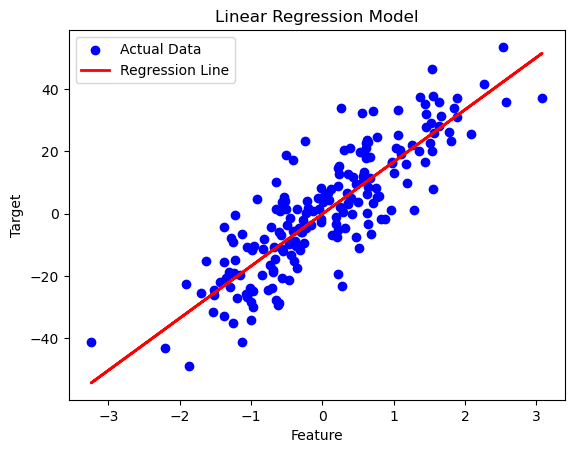

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Model")
plt.legend()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

def plot_decision_boundary(X, y, model):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()
    
if X_train.shape[1] == 2:
    plot_decision_boundary(X_train, y_train, model)


Accuracy: 0.8300
Confusion Matrix:
[[75 14]
 [20 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



Accuracy: 0.71


<Figure size 1200x800 with 0 Axes>

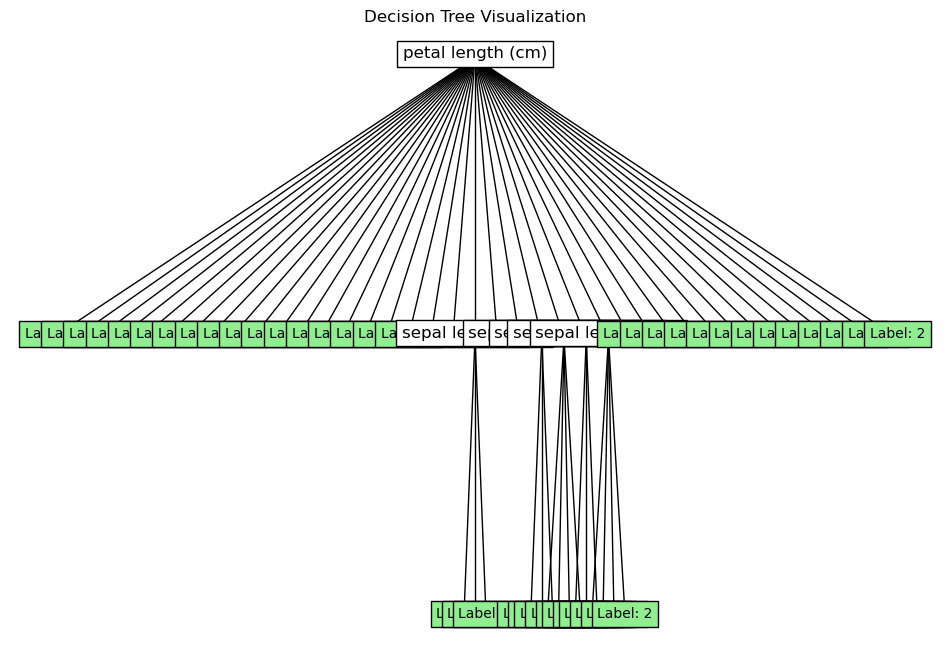

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class DecisionTree:
    def __init__(self, criterion="information_gain"):
        if criterion not in ["information_gain", "gini", "gain_ratio"]:
            raise ValueError("Criterion must be 'information_gain', 'gini', or 'gain_ratio'")
        self.criterion = criterion
        self.tree = None

    def entropy(self, y):
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    def gini_index(self, y):
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def split_info(self, y):
        return self.entropy(y)

    def information_gain(self, X_column, y):
        parent_entropy = self.entropy(y)
        
        values, counts = np.unique(X_column, return_counts=True)
        weighted_entropy = np.sum([
            (counts[i] / len(X_column)) * self.entropy(y[X_column == values[i]])
            for i in range(len(values))
        ])
        return parent_entropy - weighted_entropy

    def gain_ratio(self, X_column, y):
        ig = self.information_gain(X_column, y)
        split_info = self.split_info(X_column)
        return ig / split_info if split_info != 0 else 0

    def gini_gain(self, X_column, y):
        parent_gini = self.gini_index(y)
        
        values, counts = np.unique(X_column, return_counts=True)
        weighted_gini = np.sum([
            (counts[i] / len(X_column)) * self.gini_index(y[X_column == values[i]])
            for i in range(len(values))
        ])
        return parent_gini - weighted_gini

    def best_split(self, X, y):
        best_feature, best_value = None, -np.inf

        for feature in range(X.shape[1]):
            if self.criterion == "information_gain":
                score = self.information_gain(X[:, feature], y)
            elif self.criterion == "gini":
                score = self.gini_gain(X[:, feature], y)
            elif self.criterion == "gain_ratio":
                score = self.gain_ratio(X[:, feature], y)

            if score > best_value:
                best_feature, best_value = feature, score

        return best_feature

    def build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or X.shape[0] == 0:
            return Counter(y).most_common(1)[0][0]

        best_feature = self.best_split(X, y)
        if best_feature is None:
            return Counter(y).most_common(1)[0][0]

        tree = {best_feature: {}}
        for value in np.unique(X[:, best_feature]):
            subtree = self.build_tree(X[X[:, best_feature] == value], y[X[:, best_feature] == value], depth + 1)
            tree[best_feature][value] = subtree

        return tree

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        self.tree = self.build_tree(X, y)

    def predict_sample(self, tree, sample):
        if not isinstance(tree, dict):
            return tree

        feature = list(tree.keys())[0]
        subtree = tree[feature].get(sample[feature], None)
        if subtree is None:
            return Counter(y).most_common(1)[0][0]

        return self.predict_sample(subtree, sample)

    def predict(self, X):
        return np.array([self.predict_sample(self.tree, x) for x in X])

def plot_tree(tree, feature_names, depth=0, pos=(0, 0), parent=None, edge_label="", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis("off")

    if isinstance(tree, dict):
        feature = list(tree.keys())[0]
        values = tree[feature]

        ax.text(pos[0], pos[1], f"{feature_names[feature]}", fontsize=12, ha="center", bbox=dict(facecolor="white", edgecolor="black"))

        x_shift = 1 / (2 ** (depth + 2))
        y_shift = 0.1

        for i, (value, subtree) in enumerate(values.items()):
            new_pos = (pos[0] + x_shift * (i * 2 - len(values) + 1), pos[1] - y_shift)
            ax.plot([pos[0], new_pos[0]], [pos[1], new_pos[1]], "k-", lw=1)
            plot_tree(subtree, feature_names, depth + 1, new_pos, pos, f"{value}", ax=ax)

    else:
        ax.text(pos[0], pos[1], f"Label: {tree}", fontsize=10, ha="center", bbox=dict(facecolor="lightgreen", edgecolor="black"))

    return ax

if __name__ == "__main__":
    
    iris = load_iris()
    X = iris.data
    y = iris.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    dt = DecisionTree(criterion="information_gain")
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    plt.figure(figsize=(12, 8))
    ax = plot_tree(dt.tree, feature_names=iris.feature_names)
    plt.title("Decision Tree Visualization")
    plt.show()
